# 02. Neural Network classification with PyTorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options)

## 1. Make classification data and get it ready

In [1]:
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples=1000

# Create circles
X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

In [2]:
len(X),len(y)

(1000, 1000)

In [3]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [4]:
# Make DataFrame of circle data
import pandas as pd
circles= pd.DataFrame({"X1":X[:,0],
                       "X2":X[:,1],
                       "label":y})

circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [5]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

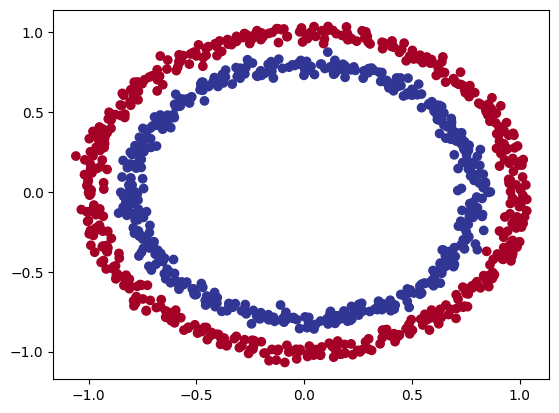

In [6]:
# Visualize, visualize,visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

**Note**: The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

### 1.1 Check input and outputs shapes

In [7]:
X.shape,y.shape

((1000, 2), (1000,))

In [8]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [9]:
# View the first eg of features and labels
X_sample=X[0]
y_sample=y[0]

print(f"Vaules for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of y: {X_sample.shape} and the same for y: {y_sample.shape}")

Vaules for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of y: (2,) and the same for y: ()


### 1.2 Turn data into Tensors and create train and test splits

In [10]:
import torch
torch.__version__

'2.3.0+cu121'

In [11]:
X.dtype, type(X)

(dtype('float64'), numpy.ndarray)

In [12]:
# Turn data into tensors
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [13]:
X.dtype,type(X)

(torch.float32, torch.Tensor)

In [14]:
y.dtype,type(y)

(torch.float32, torch.Tensor)

In [15]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2, # 0.2=20% of data will be test & 80% will be train
                                               random_state=42)

In [16]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [17]:
n_samples

1000

## 2. Building a model

Let,s build a model to clasify our blue and red dots.

To do so, we want to:
1. Setup device agonistic code so our code will run on accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss fn and optimizer
4. Create a training and test loop

In [18]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [19]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code, let's create a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` methods that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and send it to the target `device`

In [20]:
X_train.shape

torch.Size([800, 2])

In [21]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

In [22]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.linear layers capable of handling the shapes of our data
    self.layer1=nn.Linear(in_features=2, #takes in 2 features and upscales to 5 features
                          out_features=5)
    self.layer2=nn.Linear(in_features=5, #takes in 5 features from previous layes and o/ps a single feature (same shape as y)
                          out_features=1)

  # 3. Define a forward() method that outlines the forward pass
  def forward(self,x):
    return self.layer2(self.layer1(x)) # x -> layer_1 -> layer_2 -> output

# 4. Instantiate an instance of our model class and send it to the target device
model_0=CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [23]:
device

'cpu'

In [24]:
next(model_0.parameters()).device

device(type='cpu')

In [25]:
model_0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.4021,  0.6991],
                      [ 0.0248,  0.1023],
                      [ 0.6806,  0.4008],
                      [-0.6226, -0.1215],
                      [-0.0605,  0.2079]])),
             ('layer1.bias',
              tensor([-0.3792,  0.6044,  0.3091, -0.3330,  0.3872])),
             ('layer2.weight',
              tensor([[-0.2166, -0.2167,  0.1885,  0.1207, -0.4125]])),
             ('layer2.bias', tensor([-0.4088]))])

In [26]:
# Let's replicate the model above using nn.Sequential()
model_0=nn.Sequential(
    nn.Linear(in_features=2,
              out_features=5),
    nn.Linear(in_features=5,
              out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [27]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1829, -0.1199],
                      [-0.1572, -0.3382],
                      [-0.5974,  0.5293],
                      [ 0.0625,  0.5434],
                      [ 0.0080, -0.0267]])),
             ('0.bias', tensor([ 0.1806, -0.3530, -0.2048, -0.4313, -0.3065])),
             ('1.weight',
              tensor([[-0.3959,  0.2960,  0.1678,  0.2343, -0.3994]])),
             ('1.bias', tensor([-0.0403]))])

In [28]:
# Make predictions
with torch.inference_mode():
  untrained_preds=model_0(X_test.to(device))
print(f"Length of Predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Lenght of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of Predictions: 200, Shape: torch.Size([200, 1])
Lenght of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [29]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Setup loss fn and optimizer

Which loss fn or optimizer should you use?

Again... this is problem specific.

For eg for regression you might want MAE or MSE (mean absolute error or mean squared error)

For classification you might want binary cross entropy or categorical cross entropy (cross entropy)

As a reminder,the loss fn measures how wrong your models predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built in options.

* For some common choices of loss fn and optimizers

* For the loss fn we're going to use `torch.nn.BECWithLogitsLoss()`.

* For a defintion on what a logit is in deep learning

* For diff optimizers see `torch.optim`

In [30]:
# Setup the loss fn
# loss_fn=nn.BCELoss() # BCELoss = requires i/p to have gone through the sigmoid activation fn prior to i/p to BCELoss
loss_fn=nn.BCEWithLogitsLoss() # BCEWithLogitsLoss - sigmoid activation fn built-in

optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)

In [31]:
# Calculate accuracy - out of 100 eg, what percentage done our model get right?
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

## 3. Train model

To train our model,we're going to need to build a training loop with the following steps:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5.Optimizer step (Gradient descent)

### 3.1 Going from raw logits ->prediction probabilities -> prediction labels

Our model o/p are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation fn (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilites to **Prediction labels** by either rounding them or taking the `argmax()`.

In [32]:
#View the first 5 o/ps of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits=model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0325],
        [-0.0653],
        [-0.1381],
        [-0.0018],
        [-0.4423]])

In [33]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [34]:
# Use the sigmoid activation fn on our model logits to turn them into prediction probabilities
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4919],
        [0.4837],
        [0.4655],
        [0.4996],
        [0.3912]])

For our prediction probability values, we need to perform a range-style rounding on them:

* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` <=0.5, `y=0` (class 0)

In [35]:
# Find the predicted labels
y_preds=torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels=torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#check for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

#Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

### 3.2 Building a training and testing loop

In [36]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the no of epochs
epochs=100

# Put data to target device
X_train,y_train=X_train.to(device), y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs+1):
  ### Training
  model_0.train()

   # 1. Forward pass
  y_logits=model_0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits)) # Turns logits -> pred probs -> pred label

  # 2. Calculate loss/accuracy
  # loss=loss_fn(torch.sigmoid(y_logits), #nn.BCELoss expects prediction probabilites as input
  #              y_train)
  loss=loss_fn(y_logits, # nn.BCEWithLogitsLoss expects raw logits as input
               y_train)
  acc= accuracy_fn(y_true=y_train,
                   y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits=model_0(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/accuracy
    test_loss=loss_fn(test_logits,
                      y_test)
    test_acc=accuracy_fn(y_true=y_test,
                         y_pred=test_pred)
  # Print out what's happenin'
  if epoch % 10 == 0:
    print(f"epochs: {epoch} | loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

epochs: 0 | loss: 0.70319 | Acc: 41.38% | Test loss: 0.70324, Test acc: 39.00%
epochs: 10 | loss: 0.69780 | Acc: 47.88% | Test loss: 0.69840, Test acc: 43.50%
epochs: 20 | loss: 0.69564 | Acc: 48.62% | Test loss: 0.69641, Test acc: 45.00%
epochs: 30 | loss: 0.69469 | Acc: 49.88% | Test loss: 0.69548, Test acc: 46.50%
epochs: 40 | loss: 0.69421 | Acc: 49.50% | Test loss: 0.69500, Test acc: 49.00%
epochs: 50 | loss: 0.69393 | Acc: 49.12% | Test loss: 0.69471, Test acc: 52.00%
epochs: 60 | loss: 0.69374 | Acc: 49.25% | Test loss: 0.69451, Test acc: 51.00%
epochs: 70 | loss: 0.69360 | Acc: 49.62% | Test loss: 0.69438, Test acc: 51.50%
epochs: 80 | loss: 0.69350 | Acc: 49.62% | Test loss: 0.69428, Test acc: 51.50%
epochs: 90 | loss: 0.69341 | Acc: 49.25% | Test loss: 0.69420, Test acc: 51.00%
epochs: 100 | loss: 0.69334 | Acc: 49.62% | Test loss: 0.69415, Test acc: 51.00%


## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything...

So to inspect it let's make some predictions and make them visual!

In other words, "Visualize, visualize, visualize!"

To do so, we're going to import a fn called `plot_decision_boundary()`

In [37]:
import requests
from pathlib import Path

# Download helper fn from learn PyTorch repo (if it's not already download)
if Path("helper_functions.py").is_file():
  print("helper_function.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request=requests.get("http://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_function.py already exists, skipping download


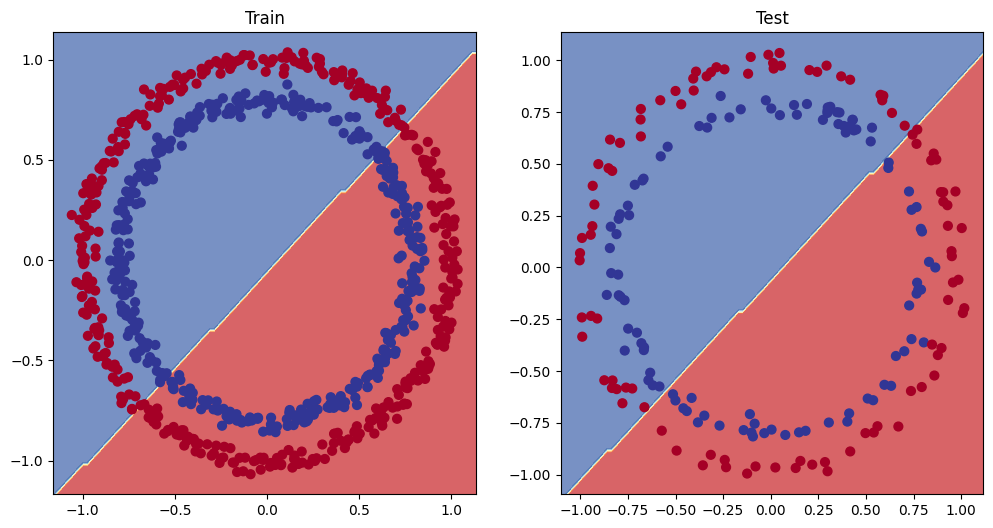

In [38]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,
                       X_train,
                       y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,
                       X_test,
                       y_test)

## 5. Improving a model (from a model perspective)

* Add more layers- give the model more changes to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation fn
* Change the learning rate
* Change the loss fn

These options are all from a model's perspective because they deal directly with the model, rather thsn the data

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred as **hyperparameters**.

Let's try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the no of layers: 2 -> 3
* Increase the no of epochs: 100 -> 1000


In [39]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,
                           out_features=10)
    self.layer_2=nn.Linear(in_features=10,
                           out_features=10)
    self.layer_3=nn.Linear(in_features=10,
                           out_features=1)

  def forward(self,x):
    # z=self.layer_1(x)
    # z=self.layer_2(z)
    # z=self.layer_3(z)
    # return z
    return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverages speed ups where possible behind the scences

model_1=CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [40]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1301, -0.1017],
                      [-0.1186, -0.3515],
                      [-0.5838,  0.5240],
                      [ 0.0898,  0.5338],
                      [-0.0531, -0.0061]])),
             ('0.bias', tensor([ 0.1411, -0.3241, -0.1911, -0.4098, -0.3496])),
             ('1.weight',
              tensor([[-0.3513,  0.2579,  0.0370,  0.1754, -0.4357]])),
             ('1.bias', tensor([0.0634]))])

In [41]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [42]:
# Create a loss fn
loss_fn=nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.1)

In [43]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs=1000

# Put data on the target device
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

for epoch in range(epochs+1):
  # Training
  model_1.train() #training setup

  # 1. Forward pass
  y_logits=model_1(X_train).squeeze() # Forward pass
  y_pred=torch.round(torch.sigmoid(y_logits)) #logits -> pred probabilites -> prediction labels

  # 2. Calculate the loss/acc
  loss=loss_fn(y_logits,
               y_train) # Calculate loss fn
  acc=accuracy_fn(y_true=y_train, # Calculate acc
                  y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad() # reset optimizer

  # 4. Loss backwards (backpropagation)
  loss.backward() # backpopagation

  # 5. Optimizer step (gradient descent)
  optimizer.step() #optimizer step

  # Testing
  model_1.eval() # Testing setup
  with torch.inference_mode(): #remove grad mode
    #1. Forward pass
    test_logits=model_1(X_test).squeeze() #forward pass
    test_pred=torch.round(torch.sigmoid(test_logits)) #logits -> pred probabilites -> prediction labels

    # 2. calculate loss/acc
    test_loss=loss_fn(test_logits,
                      y_test) # Calculate loss fn

    test_acc=accuracy_fn(y_true=y_test, # Calculate acc
                    y_pred=test_pred)

    #print fn
    if epoch % 100 == 0:
      print(f"Epochs: {epoch} | loss: {loss:.5f} | acc: {acc:.2f}% | test loss: {test_loss:.5f} | test_acc: {test_acc:.2f}%")

Epochs: 0 | loss: 0.69396 | acc: 50.88% | test loss: 0.69261 | test_acc: 51.00%
Epochs: 100 | loss: 0.69305 | acc: 50.38% | test loss: 0.69379 | test_acc: 48.00%
Epochs: 200 | loss: 0.69299 | acc: 51.12% | test loss: 0.69437 | test_acc: 46.00%
Epochs: 300 | loss: 0.69298 | acc: 51.62% | test loss: 0.69458 | test_acc: 45.00%
Epochs: 400 | loss: 0.69298 | acc: 51.12% | test loss: 0.69465 | test_acc: 46.00%
Epochs: 500 | loss: 0.69298 | acc: 51.00% | test loss: 0.69467 | test_acc: 46.00%
Epochs: 600 | loss: 0.69298 | acc: 51.00% | test loss: 0.69468 | test_acc: 46.00%
Epochs: 700 | loss: 0.69298 | acc: 51.00% | test loss: 0.69468 | test_acc: 46.00%
Epochs: 800 | loss: 0.69298 | acc: 51.00% | test loss: 0.69468 | test_acc: 46.00%
Epochs: 900 | loss: 0.69298 | acc: 51.00% | test loss: 0.69468 | test_acc: 46.00%
Epochs: 1000 | loss: 0.69298 | acc: 51.00% | test loss: 0.69468 | test_acc: 46.00%


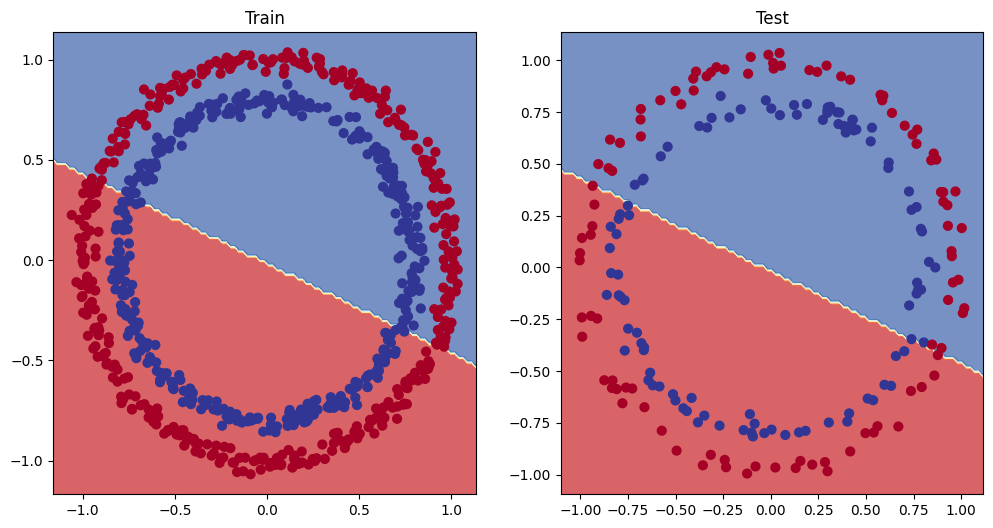

In [44]:
# Plot the decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,
                       X_train,
                       y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,
                       X_test,
                       y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem

In [45]:
# Create some data (same as notebook 01)
weight =0.7
bias=0.3
start=0
end=1
step=0.01

# Create data
X_regression= torch.arange(start,end,step).unsqueeze(dim=1)
y_regression=weight*X_regression+bias # Linear regression formula (without epsilon)
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [46]:
# Create train and test splits
train_splits=int(0.8*len(X_regression))
X_train_regression,y_train_regression=X_regression[:train_splits],y_regression[:train_splits]
X_test_regression,y_test_regression=X_regression[train_splits:],y_regression[train_splits:]

#Check the len of each
len(X_train_regression),len(X_test_regression),len(y_train_regression),len(y_test_regression)

(80, 20, 80, 20)

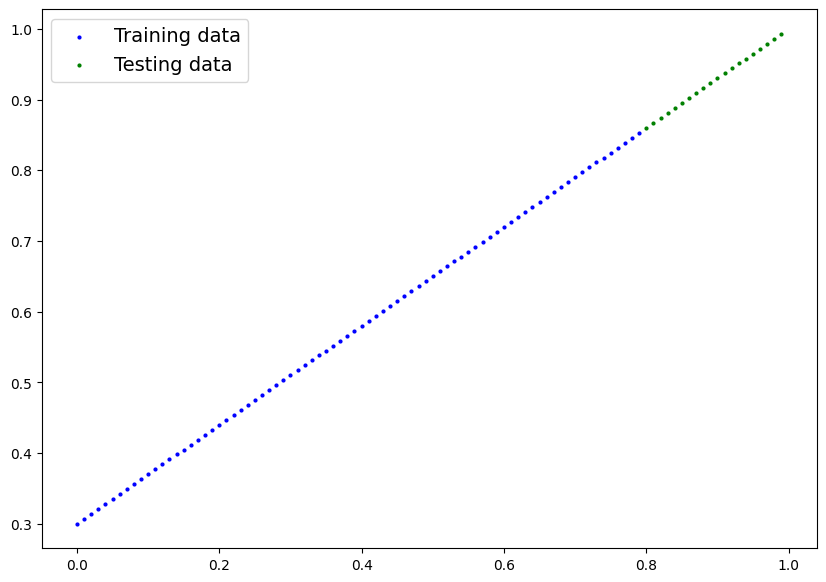

In [47]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=None)

### 5.2 Adjusting `model_1` to fit a straight line

In [48]:
# Same architecture as model_1 (but using nn.Sequential())
model_2=nn.Sequential(
    nn.Linear(in_features=1,
              out_features=10),
    nn.Linear(in_features=10,
              out_features=10),
    nn.Linear(in_features=10,
              out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [49]:
# Loss and optimizer
loss_fn=nn.L1Loss() #MAE loss with regression data
optimizer=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.01)

In [50]:
#Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the no of epochs
epochs=1000

# Put the data on the target device
X_train_regression,y_train_regression=X_train_regression.to(device),y_train_regression.to(device)
X_test_regression,y_test_regression=X_test_regression.to(device),y_test_regression.to(device)

# Training
for epoch in range(epochs+1):
  model_2.train()
  y_pred=model_2(X_train_regression)
  loss=loss_fn(y_pred,
               y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred=model_2(X_test_regression)
    test_loss=loss_fn(test_pred,
                 y_test_regression)

  # Print fn
  if epoch % 100 == 0:
    print(f"Epochs:{epoch} | loss: {loss:.5f} | test_loss: {test_loss:.5f}")


Epochs:0 | loss: 0.75986 | test_loss: 0.91103
Epochs:100 | loss: 0.02858 | test_loss: 0.00081
Epochs:200 | loss: 0.02533 | test_loss: 0.00209
Epochs:300 | loss: 0.02137 | test_loss: 0.00305
Epochs:400 | loss: 0.01964 | test_loss: 0.00341
Epochs:500 | loss: 0.01940 | test_loss: 0.00387
Epochs:600 | loss: 0.01903 | test_loss: 0.00379
Epochs:700 | loss: 0.01878 | test_loss: 0.00381
Epochs:800 | loss: 0.01840 | test_loss: 0.00329
Epochs:900 | loss: 0.01798 | test_loss: 0.00360
Epochs:1000 | loss: 0.01782 | test_loss: 0.00333


In [51]:
# Turn on evaluation model
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
  y_preds=model_2(X_test_regression)

y_preds

tensor([[0.8596],
        [0.8663],
        [0.8730],
        [0.8797],
        [0.8864],
        [0.8931],
        [0.8998],
        [0.9065],
        [0.9131],
        [0.9198],
        [0.9265],
        [0.9332],
        [0.9399],
        [0.9466],
        [0.9533],
        [0.9600],
        [0.9666],
        [0.9733],
        [0.9800],
        [0.9867]])

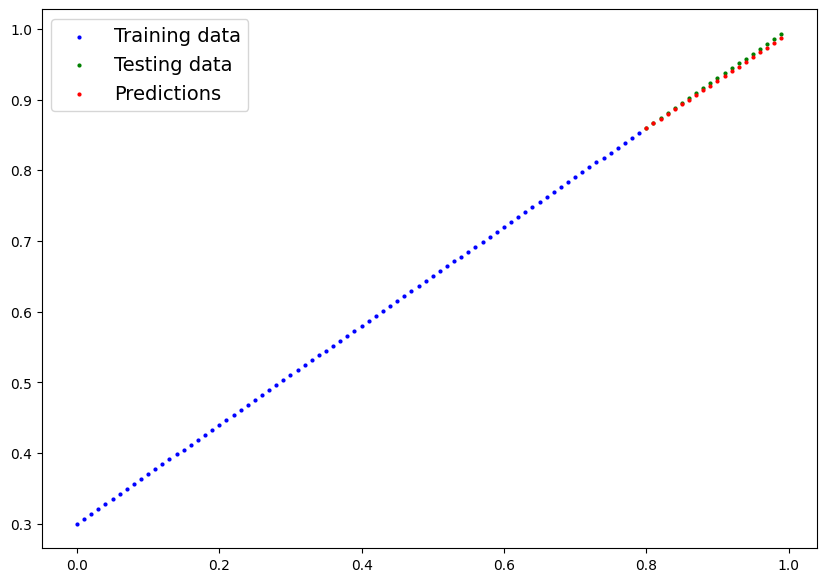

In [52]:
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

## 6. The missing piece: non_Linearity

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

Or in machine learning terms, an infinite (but really it is finite) of linear and non_linear functions?

### 6.1 Recreating non_linear data(red and circles)

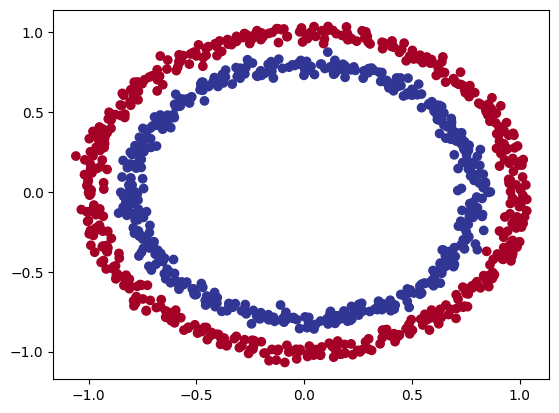

In [53]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples=1000
X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

plt.scatter(X[:,0],
            X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [54]:
# Convert data to tensors and then to train and test split
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

# Split into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42)

len(X_train),len(y_train),len(X_test),len(y_test)

(800, 800, 200, 200)

In [55]:
X_train[:5],y_test[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 1., 0., 1.]))

### 6.2 Building a model with non-linearity

* Linear = straight linear
* Non-linear = non-straight lines

Artificial nerual networks are a large combination of linear(straight) and (non-linear) fns which are potentially able to find patterns in data

In [56]:
# Build a model with non-linear activation fns
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,
                           out_features=10)
    self.layer_2=nn.Linear(in_features=10,
                           out_features=10)
    self.layer_3=nn.Linear(in_features=10,
                           out_features=1)
    self.relu=nn.ReLU() # relu is a non-linear activation

  def forward(self,x):
    # Where should we put our non-linear activation fn?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3=CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [57]:
# Setup loss and optimizer
loss_fn=nn.BCEWithLogitsLoss()

optimizer=torch.optim.SGD(params=model_3.parameters(),
                   lr=0.1)

### 6.3 Training a model with non-linearlity

In [58]:
len(X_train),len(y_train)

(800, 800)

In [59]:
y_logits.shape,y_train.shape

(torch.Size([800]), torch.Size([800]))

In [60]:
test_logits.shape,y_test.shape

(torch.Size([200]), torch.Size([200]))

In [61]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

# Loop through data
epochs=1000

for epoch in range(epochs+1):
  ### Training
  model_3.train()

  # 1. Forward pass
  y_logits=model_3(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilites -> prediction labels

  # 2.calculate the loss
  loss=loss_fn(y_logits, # BCEWithLogitsLoss (takes in logits as first input)
               y_train)
  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred)

  # 3.Optimizer zero grad
  optimizer.zero_grad()

  # 4. backward loss (Backpropagation)
  loss.backward()

  # 5. optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits=model_3(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

  # Calcuate loss & acc
  test_loss=loss_fn(test_logits,
                    y_test)
  test_acc=accuracy_fn(y_true=y_test,
                  y_pred=test_pred)

  # print fn
  if epoch % 100 == 0:
    print(f"Epochs: {epoch} | loss: {loss:.5f} | acc: {acc:.2f}% | test loss: {test_loss:.5f} | test acc: {test_acc:.2f}%")

Epochs: 0 | loss: 0.69295 | acc: 50.00% | test loss: 0.69319 | test acc: 50.00%
Epochs: 100 | loss: 0.69115 | acc: 52.88% | test loss: 0.69102 | test acc: 52.50%
Epochs: 200 | loss: 0.68977 | acc: 53.37% | test loss: 0.68940 | test acc: 55.00%
Epochs: 300 | loss: 0.68795 | acc: 53.00% | test loss: 0.68723 | test acc: 56.00%
Epochs: 400 | loss: 0.68517 | acc: 52.75% | test loss: 0.68411 | test acc: 56.50%
Epochs: 500 | loss: 0.68102 | acc: 52.75% | test loss: 0.67941 | test acc: 56.50%
Epochs: 600 | loss: 0.67515 | acc: 54.50% | test loss: 0.67285 | test acc: 56.00%
Epochs: 700 | loss: 0.66659 | acc: 58.38% | test loss: 0.66322 | test acc: 59.00%
Epochs: 800 | loss: 0.65160 | acc: 64.00% | test loss: 0.64757 | test acc: 67.50%
Epochs: 900 | loss: 0.62362 | acc: 74.00% | test loss: 0.62145 | test acc: 79.00%
Epochs: 1000 | loss: 0.56818 | acc: 87.75% | test loss: 0.57378 | test acc: 86.50%


### 6.4 Evaluating a model trained with non-linear activation functions

In [62]:
# Makes predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

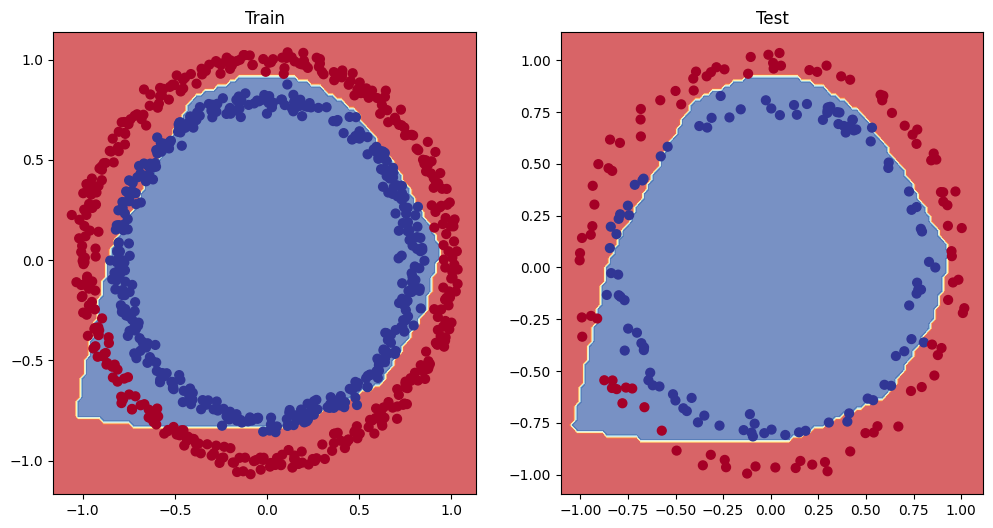

In [63]:
# Plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,
                       X_train,
                       y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,
                       X_test,
                       y_test)

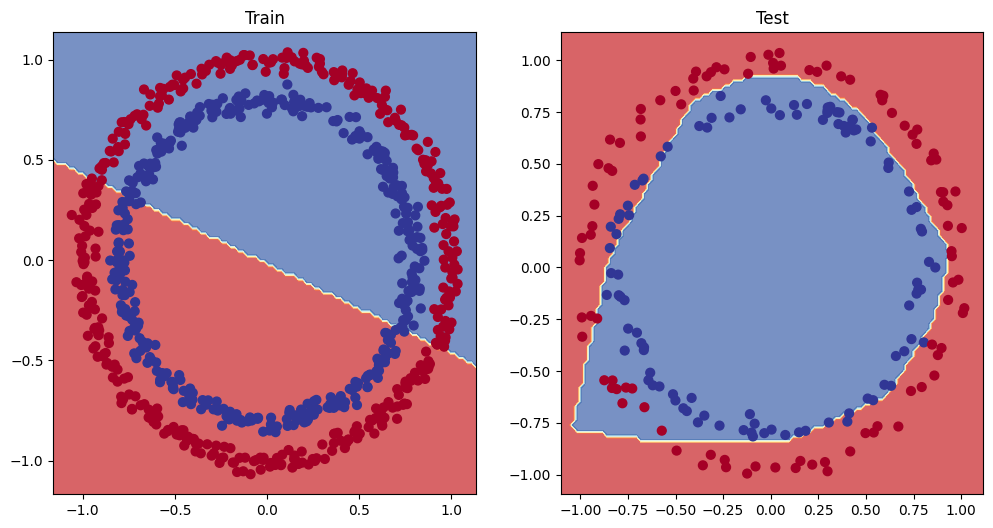

In [64]:
# Plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, # model_1 = no non_linearity
                       X_train,
                       y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, #model_3 = non_linearlty
                       X_test,
                       y_test)

**Challenge:** Can you improve model_3 to do better than 80% accuracy on the test data?

## 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear&non-linear functions.

In [65]:
# create a tensor
A = torch.arange(-10,10,1,dtype=torch.float32)
A.dtype

torch.float32

In [66]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

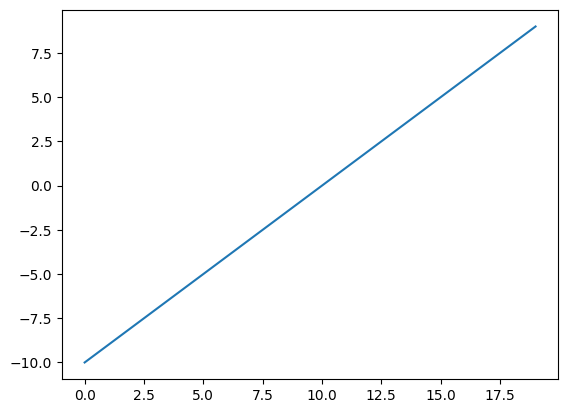

In [67]:
# Visualize the tensor
plt.plot(A)

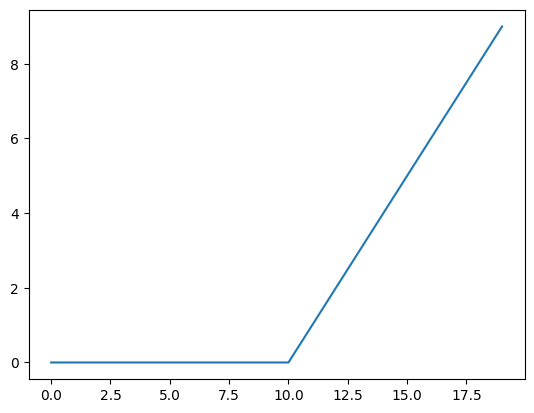

In [68]:
plt.plot(torch.relu(A))

In [69]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [70]:
def relu(x:torch.Tensor)->torch.Tensor:
  return torch.maximum(torch.tensor(0),x) #inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

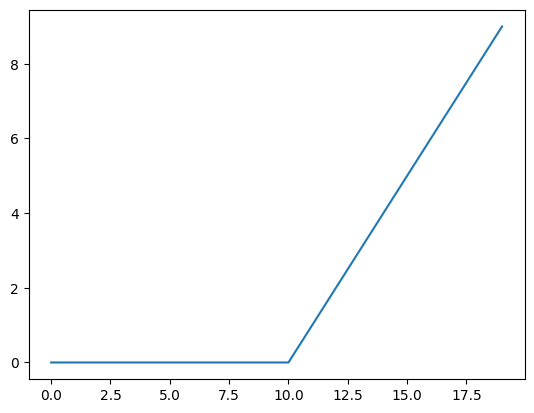

In [71]:
# Plot ReLU activation functions
plt.plot(relu(A))

In [72]:
# Now let's do the same for sigmoid
def sigmoid(x):
  return 1/(1+torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

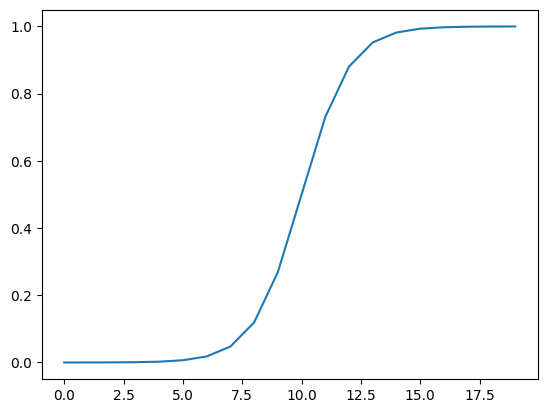

In [73]:
plt.plot(sigmoid(A))

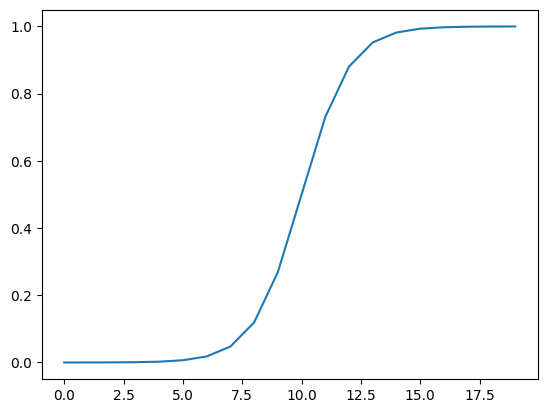

In [74]:
plt.plot(torch.sigmoid(A))

## 8. Putting it all together with a multi-class classification problem

* Binary classification = one thing or another (cat vs. dog, spam vs. not spam, fraud or not fraud)
* Multi-class classification = more than one thing or another (cat vs. dog vs. chicken)

### 8.1 Creating a toy multi-class dataset

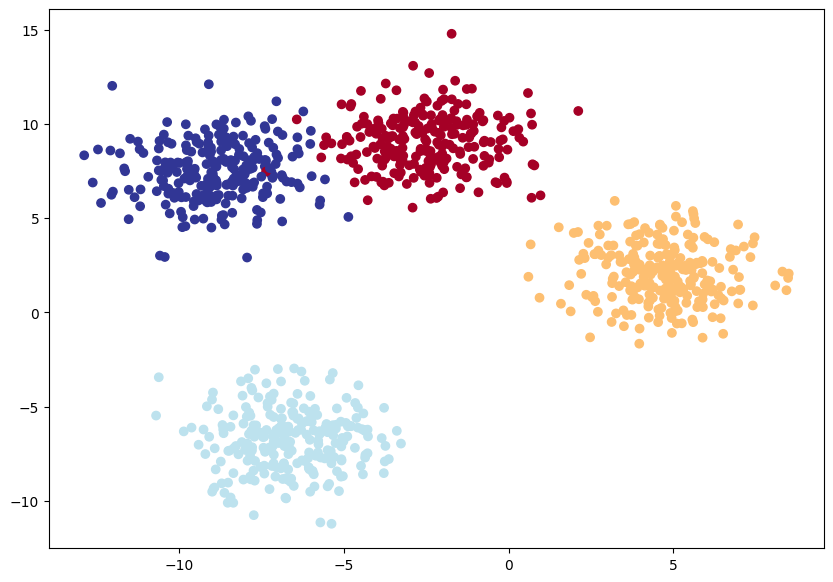

In [75]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES=4
NUM_FEATURES=2
RANDOM_SEED=42

# 1. Create multi-class data
X_blob,y_blob=make_blobs(n_samples=1000,
                         n_features=NUM_FEATURES,
                         centers=NUM_CLASSES,
                         cluster_std=1.5, # give the clusters a little shake up
                         random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob=torch.from_numpy(X_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train,X_blob_test,y_blob_train,y_blob_test=train_test_split(X_blob,
                                                                   y_blob,
                                                                   test_size=0.2,
                                                                   random_state=RANDOM_SEED)

# plot data (visualize,visualize,visualize)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],
            X_blob[:,1],
            c=y_blob,
            cmap=plt.cm.RdYlBu)

In [76]:
X_blob[:5],y_blob[:5]

(tensor([[-8.4134,  6.9352],
         [-5.7665, -6.4312],
         [-6.0421, -6.7661],
         [ 3.9508,  0.6984],
         [ 4.2505, -0.2815]]),
 tensor([3, 2, 2, 1, 1]))

### 8.2 Building a multi-class classification model in PyTorch

In [77]:
# Create device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [78]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    """Initializes multi-class classification model.

    Args:
      input features (int): No of input features to the model
      output features (int): No of output features (no of output classes) to the model
      hidden_units (int): no of hidden units between layers, default 8

      Returns:

      Example:
      """
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features,
                  out_features=hidden_units),
        # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
        nn.Linear(in_features=hidden_units,
                  out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4=BlobModel(input_features=NUM_FEATURES,
                  output_features=NUM_CLASSES,
                  hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [79]:
X_blob_train.shape,y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [80]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### 8.3 Create a loss fn and an optimizer for a multi-class classification

In [81]:
# Create a loss fn for multi-class classification - loss fn measures how wrong our model's predictions are
loss_fn=nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification - optimizer updates our model parameters to try and reduce the loss
optimizer=torch.optim.SGD(params=model_4.parameters(),
                          lr=0.1) # learning rate is a hyperparameters you can change

### 8.4 Getting prediction probabilites for a multi-class Pytorch model

In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to prediction probabilites and then to prediction labels.

Logits (raw output of the model) -> Pred prob (use `torch.softmax`) -> Pred labels (take the argmax of the prediction probabilities

In [82]:
# Let's get some raw ouputs of our model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits=model_4(X_blob_train.to(device))

y_logits[:10]

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804],
        [-0.5073, -1.2865, -0.7239,  0.3814],
        [ 0.6031, -1.6200,  0.4522,  1.5135],
        [-0.9233, -0.5593, -1.0775, -0.4963],
        [ 1.7228, -1.0307,  1.7717,  1.9579],
        [ 0.5619, -1.4183,  0.4359,  1.3289]])

In [83]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [84]:
# Convert our model's logit outputs to prediction probabilites
y_pred_probs=torch.softmax(y_logits,dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]])
tensor([[0.1838, 0.3422, 0.1500, 0.3239],
        [0.2199, 0.0377, 0.1839, 0.5586],
        [0.3406, 0.0482, 0.5326, 0.0785],
        [0.3405, 0.0657, 0.4446, 0.1492],
        [0.2527, 0.0424, 0.2283, 0.4766]])


In [85]:
y_pred_probs[0]

tensor([0.1838, 0.3422, 0.1500, 0.3239])

In [86]:
torch.sum(y_pred_probs[0])

tensor(1.)

In [87]:
torch.max(y_pred_probs[0])

tensor(0.3422)

In [88]:
torch.argmax(y_pred_probs[0])

tensor(1)

In [89]:
# Convert our model's prediction probabilites to prediction labels
y_preds=torch.argmax(y_pred_probs,dim=1)
y_preds[:10]

tensor([1, 3, 2, 2, 3, 3, 3, 3, 3, 3])

In [90]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

### 8.5 Creating a training loop and testing loop for a multi-class Pytorch model  

In [91]:
# Fit the multi-class model to the data
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

# set no of epochs
epochs=100

# Put data to the target device
X_blob_train,y_blob_train=X_blob_train.to(device),y_blob_train.to(device)
X_blob_test,y_blob_test=X_blob_test.to(device),y_blob_test.to(device)

# Loop through data
for epoch in range(epochs+1):
  ### Training
  model_4.train()


  y_logits=model_4(X_blob_train)
  y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)

  loss=loss_fn(y_logits,
               y_blob_train)
  acc=accuracy_fn(y_true=y_blob_train,
                  y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ### Testing
  model_4.eval()

  with torch.inference_mode():
    test_logits=model_4(X_blob_test)
    test_pred=torch.softmax(test_logits,dim=1).argmax(dim=1)

    test_loss=loss_fn(test_logits,
                      y_blob_test)
    test_acc=accuracy_fn(y_true=y_blob_test,
                         y_pred=test_pred)

  # Print fn
  if epoch % 10 == 0:
    print(f"Epochs: {epoch} | loss: {loss:.5f} | acc: {acc:.2f}% | test loss: {test_loss:.5f} | test acc: {test_acc:.2f}%")

Epochs: 0 | loss: 1.04324 | acc: 65.50% | test loss: 0.57861 | test acc: 95.50%
Epochs: 10 | loss: 0.14398 | acc: 99.12% | test loss: 0.13037 | test acc: 99.00%
Epochs: 20 | loss: 0.08062 | acc: 99.12% | test loss: 0.07216 | test acc: 99.50%
Epochs: 30 | loss: 0.05924 | acc: 99.12% | test loss: 0.05133 | test acc: 99.50%
Epochs: 40 | loss: 0.04892 | acc: 99.00% | test loss: 0.04098 | test acc: 99.50%
Epochs: 50 | loss: 0.04295 | acc: 99.00% | test loss: 0.03486 | test acc: 99.50%
Epochs: 60 | loss: 0.03910 | acc: 99.00% | test loss: 0.03083 | test acc: 99.50%
Epochs: 70 | loss: 0.03643 | acc: 99.00% | test loss: 0.02799 | test acc: 99.50%
Epochs: 80 | loss: 0.03448 | acc: 99.00% | test loss: 0.02587 | test acc: 99.50%
Epochs: 90 | loss: 0.03300 | acc: 99.12% | test loss: 0.02423 | test acc: 99.50%
Epochs: 100 | loss: 0.03185 | acc: 99.12% | test loss: 0.02293 | test acc: 99.50%


### 8.6 Making and evaluating predictions with a PyTorch multi-class model

In [92]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits=model_4(X_blob_test)

y_logits[:10]

tensor([[  4.3551,  10.3920, -14.9378,  -9.7940],
        [  5.0249, -12.0799,   3.3984,  10.6999],
        [ -5.6140, -13.3927,  21.0484,  12.8085],
        [  1.8479,   7.5879,  -8.6272,  -7.0156],
        [  8.0997,   3.3034, -14.6397,  -3.6309],
        [  5.5958, -15.0054,   5.0344,  13.3266],
        [ -5.9993, -10.2278,  18.9179,   9.9470],
        [  7.0976,  -0.7620,  -9.5784,   0.1726],
        [ -5.6194, -18.6659,  25.6036,  17.6314],
        [  7.3378,   0.7232, -11.2318,  -1.2062]])

In [93]:
# Go from logits -> prediction probabilites
y_pred_probs=torch.softmax(y_logits,dim=1)
y_pred_probs[:10]

tensor([[2.3832e-03, 9.9762e-01, 9.9620e-12, 1.7071e-09],
        [3.4166e-03, 1.2738e-10, 6.7180e-04, 9.9591e-01],
        [2.6337e-12, 1.1023e-15, 9.9974e-01, 2.6383e-04],
        [3.2043e-03, 9.9680e-01, 9.0462e-08, 4.5329e-07],
        [9.9180e-01, 8.1919e-03, 1.3207e-10, 7.9778e-06],
        [4.3880e-04, 4.9575e-13, 2.5030e-04, 9.9931e-01],
        [1.5085e-11, 2.1987e-13, 9.9987e-01, 1.2704e-04],
        [9.9863e-01, 3.8549e-04, 5.7164e-08, 9.8152e-04],
        [2.7534e-14, 5.9408e-20, 9.9966e-01, 3.4479e-04],
        [9.9847e-01, 1.3386e-03, 8.6032e-09, 1.9443e-04]])

In [94]:
# Go from pred probs to pred lables
y_preds=torch.argmax(y_pred_probs,dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [95]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

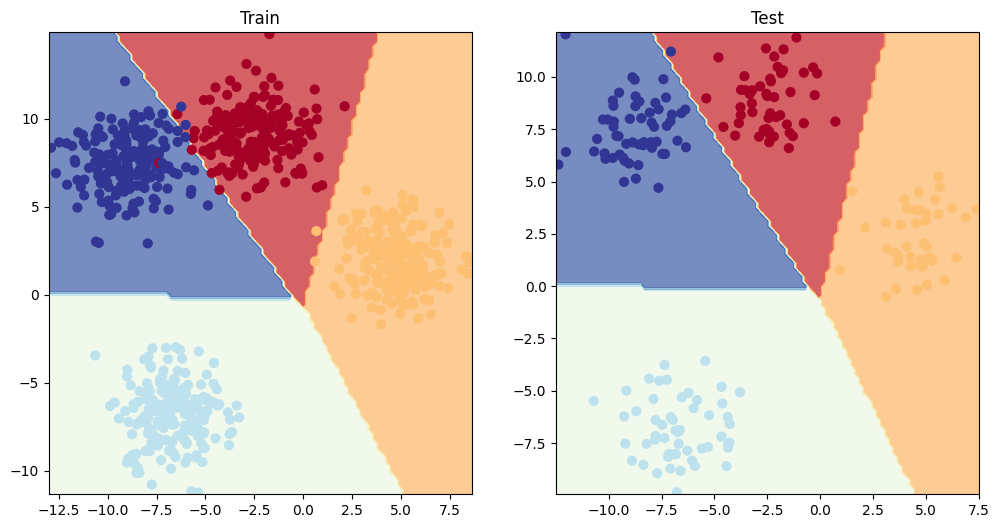

In [96]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,
                       X_blob_train,
                       y_blob_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,
                       X_blob_test,
                       y_blob_test)

## 9. A few more classification metrics... (to evaluate our classification model)

* Accuracy - out of 100 samples, how many does our model get right?
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report


In [97]:
!pip install torchmetrics

In [98]:
from torchmetrics import Accuracy

# Setup metric
torchmetric_accuracy= Accuracy(task="multiclass",num_classes=NUM_CLASSES).to(device)

# Calculate accuracy
torchmetric_accuracy(y_preds,y_blob_test)

tensor(0.9950)